Alpha Centauri B https://www.aanda.org/articles/aa/pdf/2017/01/aa29505-16.pdf R =0.8632 * R_sun

In [2]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
from astroquery.vizier import Vizier
from astropy.constants import h, c, k_B, R_sun

In [3]:
R = (0.8632 * R_sun).to(u.au)
R

<Quantity 0.00401428 AU>

In [4]:
D = (1.34 * u.pc).to(u.au)
D

<Quantity 276394.84037111 AU>

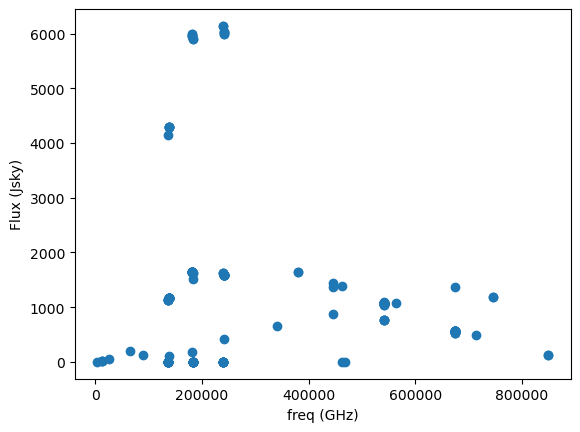

In [5]:
radius=5
target="Alpha+Centauri+B"
sed=Table.read(f"https://vizier.cds.unistra.fr/viz-bin/sed?-c={target}&-c.rs={radius}")

fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel('freq (GHz)')
ax.set_ylabel('Flux (Jsky)')

ax.scatter(sed["sed_freq"], sed["sed_flux"])
plt.show()

In [6]:
eflux = np.array(np.nan_to_num(sed['sed_eflux']))
mask = np.where(eflux != 0)
sed= sed[mask]

In [7]:
sed.info

<Table length=68>
   name     dtype  unit   format                                                                                              description                                                                                             n_bad
---------- ------- ---- --------- --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- -----
  _RAJ2000 float64  deg {:14.10f}                                                                                                            Right ascension (FK5, Equinox=J2000.0) at Epoch=J2000, proper motions taken into account     0
  _DEJ2000 float64  deg {:14.10f}                                                                                                                Declination (FK5, Equinox=J2000.0) at Epoch=J2000, proper motions taken into account     0
  _tabname   str32                    

In [8]:
sed['sed_filter']

Johnson:B
POSS-II:F
2MASS:H
2MASS:J
2MASS:H
2MASS:J
2MASS:Ks
Johnson:H
Johnson:J
Johnson:V
2MASS:Ks


In [9]:
t = Table()
t['lambda_nm'] = sed['sed_freq'].to(u.nm, equivalencies=u.spectral())
t['flux'] = np.array(sed['sed_flux'])
t['eflux'] = eflux[mask]

In [10]:
t

lambda_nm,flux,eflux
nm,,
float64,float32,float32
444.203,536.0,10.0
639.994,9.05e-05,4.88e-05
1649.48,5960.0,1220.0
1239.02,6020.0,740.0
1649.48,5960.0,1220.0
1239.02,6020.0,740.0
2163.79,4290.0,1040.0
1630.02,5910.0,1210.0


In [11]:
t = t[np.where(t['eflux'] < 0.2 * t['flux'])]
t = t[np.where(t['lambda_nm'].data < 3000)]
t

lambda_nm,flux,eflux
nm,,
float64,float32,float32
444.203,536.0,10.0
1239.02,6020.0,740.0
1239.02,6020.0,740.0
1250.02,6140.0,750.0
553.705,1050.0,100.0
1250.02,6140.0,750.0
553.705,1050.0,100.0
444.203,536.0,10.0


<ErrorbarContainer object of 3 artists>

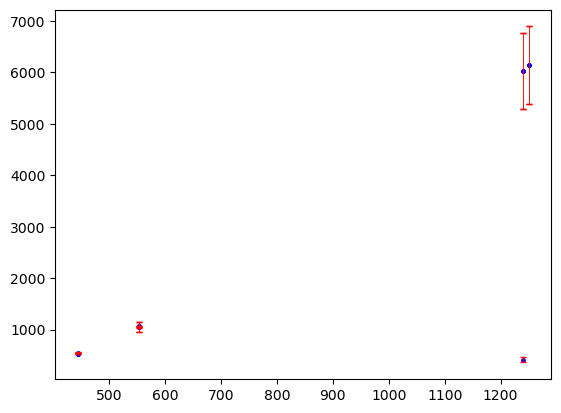

In [12]:
plt.scatter(t['lambda_nm'].data, t['flux'], c='blue', linewidth=1, s=6)
plt.errorbar(t['lambda_nm'].data, t['flux'], yerr=t['eflux'], fmt='none', ecolor='red', elinewidth=0.5, capsize=2)

In [13]:
# t = t[np.where(t['eflux'] < 300)]

<ErrorbarContainer object of 3 artists>

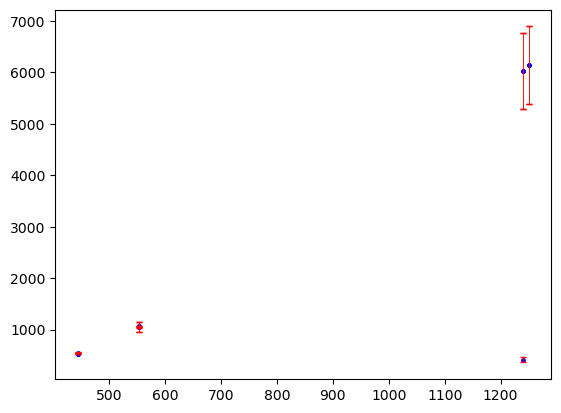

In [14]:
plt.scatter(t['lambda_nm'].data, t['flux'], c='blue', linewidth=1, s=6)
plt.errorbar(t['lambda_nm'].data, t['flux'], yerr=t['eflux'], fmt='none', ecolor='red', elinewidth=0.5, capsize=2)

In [15]:
t = t[t['flux'] > 1000]

In [16]:
t

lambda_nm,flux,eflux
nm,,
float64,float32,float32
1239.02,6020.0,740.0
1239.02,6020.0,740.0
1250.02,6140.0,750.0
553.705,1050.0,100.0
1250.02,6140.0,750.0
553.705,1050.0,100.0
553.705,1050.0,10.0
553.705,1070.0,10.0


<ErrorbarContainer object of 3 artists>

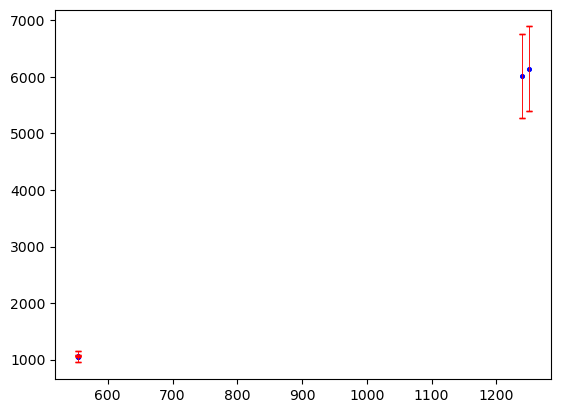

In [17]:
plt.scatter(t['lambda_nm'].data, t['flux'], c='blue', linewidth=1, s=6)
plt.errorbar(t['lambda_nm'].data, t['flux'], yerr=t['eflux'], fmt='none', ecolor='red', elinewidth=0.5, capsize=2)

In [18]:
def planck_law_lambda(wavelength, T):
    wavelength_m = wavelength.to(u.m)
    return (2*np.pi*h*c*c/wavelength_m**5)*(1/(np.exp(h*c/(wavelength_m*k_B*T))-1)) * (R / D)**2

In [19]:
def planck_jy(wavelength, T):
    wave = np.array(wavelength) * u.nm
    wavelength_m = wave.to(u.m)
    B_lambda = (2 * h * c**2 / wavelength_m**5) / (np.exp(h * c / (wavelength_m * k_B * T)) - 1)
    F_lambda = np.pi * B_lambda * (R / D)**2
    F_nu = F_lambda.to(u.Jy, equivalencies=u.spectral_density(wavelength_m))
    return F_nu

In [20]:
def chi_squ(T):
    T = T * u.K
    model = planck_law_lambda(t['lambda_nm'], T)
    wavelengths = np.array(t['lambda_nm'].data) * u.nm
    model = model.to(u.Jy, equivalencies=u.spectral_density(wavelengths))
    chi2 = np.sum((((t['flux'] * u.Jy - model) ** 2) / (t['eflux']* u.Jy) ** 2))
    return chi2

In [21]:
from scipy import optimize
minimum = optimize.fmin(chi_squ, 5770)
print(f"Оптимальная температура: {minimum[0]} K")

Optimization terminated successfully.
         Current function value: 143.193908
         Iterations: 25
         Function evaluations: 50
Оптимальная температура: 5208.643421769142 K


In [22]:
chi_squ_red = 7 / (len(t) - 1)
chi_squ_red

0.875

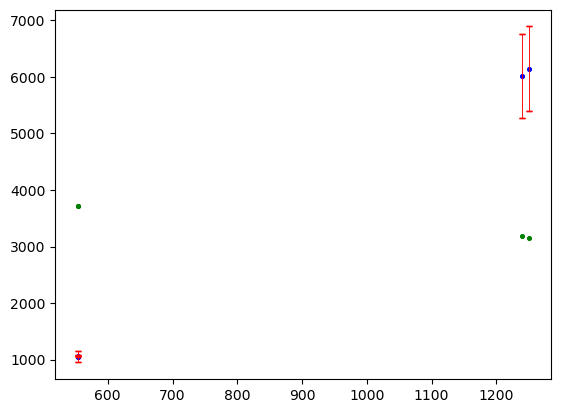

In [23]:
plt.scatter(t['lambda_nm'].data, t['flux'], c='blue', linewidth=1, s=6)
plt.errorbar(t['lambda_nm'].data, t['flux'], yerr=t['eflux'], fmt='none', ecolor='red', elinewidth=0.5, capsize=2)
wavelengths = np.array(t['lambda_nm'].data) * u.nm
plt.scatter(t['lambda_nm'].data,  (planck_law_lambda(t['lambda_nm'], 6919 * u.K).to(u.Jy, equivalencies=u.spectral_density(wavelengths))), c='green', linewidth=1, s=6)

In [24]:
sed['_RAJ2000', '_DEJ2000']

_RAJ2000,_DEJ2000
deg,deg
float64,float64
219.8961680000,-60.8371540000
219.8960300000,-60.8369150000
219.8961667000,-60.8371667000
219.8961667000,-60.8371667000
219.8961667000,-60.8371667000
219.8961667000,-60.8371667000
219.8962000000,-60.8372000000
219.8962000000,-60.8372000000


In [25]:
!pip install astropy_healpix

In [40]:
from astropy_healpix import HEALPix
import astropy.coordinates as coord

In [41]:
data = np.load('I_355_tgextmap.npz')
print(data.keys())

KeysView(NpzFile 'I_355_tgextmap.npz' with keys: HPId, HPlevel, A0, e_A0, Ntracers)


In [42]:
extinction_map = data['A0']

In [43]:
ra, dec = sed['_RAJ2000'][0].data, sed['_DEJ2000'][0].data
c = coord.SkyCoord(ra * u.deg, dec * u.deg, distance = 1.34 * u.pc, frame='icrs')

In [44]:
hp_level = 9
NSIDE = 2**hp_level
Npix = 12*NSIDE**2

In [45]:
hp = HEALPix(nside=NSIDE, order='nested', frame='icrs')
extinction_value = extinction_map[np.where(data['HPId'] == hp.skycoord_to_healpix(c))]
print(extinction_value)

[0.]


In [47]:
t['flux_corr'] = t['flux'] * 10**(0.4 * extinction_value)
t

lambda_nm,flux,eflux,flux_corr
nm,,,
float64,float32,float32,float64
1649.48,5960.0,1220.0,5960.0
1239.02,6020.0,740.0,6020.0
2163.79,4290.0,1040.0,4290.0
1649.48,5960.0,1220.0,5960.0
1239.02,6020.0,740.0,6020.0
2190.02,2580.0,720.0,2580.0
2190.02,2580.0,720.0,2580.0
2190.02,4150.0,1000.0,4150.0
